In [1]:
library(reticulate)
use_python("/opt/conda/bin/python3.10",required=T)
py_config()
library(rhdf5)
library(Seurat)
library(ggplot2)
library(dplyr)
library(spatialLIBD)
source('BEER/BEER.R')

python:         /opt/conda/bin/python3.10
libpython:      /opt/conda/lib/libpython3.10.so
pythonhome:     /opt/conda:/opt/conda
version:        3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
numpy:          /opt/conda/lib/python3.10/site-packages/numpy
numpy_version:  1.22.4

NOTE: Python version was forced by use_python function

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SpatialExperiment

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package

[1] "Welcome to BEER (v0.1.9)!"


Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:IRanges’:

    collapse


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.

Loading required package: genefilter


Attaching package: ‘genefilter’


The following objects are masked from ‘package:MatrixGenerics’:

    rowSds, rowVars


The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars


Loading required package: BiocParallel


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [2]:
getwd()

[1] "/workspace/spatial_integration"

In [3]:
# tes <- readRDS('dataset/logcount_673.rds')
# to_save <- as.data.frame(tes)
# saveRDS(to_save,'dataset/df_logcount_673.rds')

In [4]:
# sce_layer <- fetch_data(type = "sce_layer")

In [5]:
# saveRDS(sce_layer, 'dataset/sce_only.rds')
# sce_layer

In [6]:
spe_all <- readRDS('dataset/spe_all.rds')

In [7]:
spe_all

class: SpatialExperiment 
dim: 33538 47681 
metadata(0):
assays(2): counts logcounts
rownames(33538): ENSG00000243485 ENSG00000237613 ... ENSG00000277475
  ENSG00000268674
rowData names(9): source type ... gene_search is_top_hvg
colnames(47681): AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 ...
  TTGTTTCCATACAACT-1 TTGTTTGTGTAAATTC-1
colData names(69): sample_id Cluster ... array_row array_col
reducedDimNames(6): PCA TSNE_perplexity50 ... TSNE_perplexity80
  UMAP_neighbors15
mainExpName: NULL
altExpNames(0):
spatialCoords names(2) : pxl_col_in_fullres pxl_row_in_fullres
imgData names(4): sample_id image_id data scaleFactor

In [8]:
colnames(rowData(spe_all))

[1] "source"       "type"         "gene_id"      "gene_version" "gene_name"   
[6] "gene_source"  "gene_biotype" "gene_search"  "is_top_hvg"

In [9]:
colnames(colData(spe_all))

[1] "sample_id"                   "Cluster"                    
 [3] "sum_umi"                     "sum_gene"                   
 [5] "subject"                     "position"                   
 [7] "replicate"                   "subject_position"           
 [9] "discard"                     "key"                        
[11] "cell_count"                  "SNN_k50_k4"                 
[13] "SNN_k50_k5"                  "SNN_k50_k6"                 
[15] "SNN_k50_k7"                  "SNN_k50_k8"                 
[17] "SNN_k50_k9"                  "SNN_k50_k10"                
[19] "SNN_k50_k11"                 "SNN_k50_k12"                
[21] "SNN_k50_k13"                 "SNN_k50_k14"                
[23] "SNN_k50_k15"                 "SNN_k50_k16"                
[25] "SNN_k50_k17"                 "SNN_k50_k18"                
[27] "SNN_k50_k19"                 "SNN_k50_k20"                
[29] "SNN_k50_k21"                 "SNN_k50_k22"                
[31] "SNN_k50_k23"                 "SNN_k50_k24"                
[33] "SNN_k50_k25"                 "SNN_k50_k26"                
[35] "SNN_k50_k27"                 "SNN_k50_k28"                
[37] "GraphBased"                  "Maynard"                    
[39] "Martinowich"                 "layer_guess"                
[41] "layer_guess_reordered"       "layer_guess_reordered_short"
[43] "expr_chrM"                   "expr_chrM_ratio"            
[45] "SpatialDE_PCA"               "SpatialDE_pool_PCA"         
[47] "HVG_PCA"                     "pseudobulk_PCA"             
[49] "markers_PCA"                 "SpatialDE_UMAP"             
[51] "SpatialDE_pool_UMAP"         "HVG_UMAP"                   
[53] "pseudobulk_UMAP"             "markers_UMAP"               
[55] "SpatialDE_PCA_spatial"       "SpatialDE_pool_PCA_spatial" 
[57] "HVG_PCA_spatial"             "pseudobulk_PCA_spatial"     
[59] "markers_PCA_spatial"         "SpatialDE_UMAP_spatial"     
[61] "SpatialDE_pool_UMAP_spatial" "HVG_UMAP_spatial"           
[63] "pseudobulk_UMAP_spatial"     "markers_UMAP_spatial"       
[65] "spatialLIBD"                 "ManualAnnotation"           
[67] "in_tissue"                   "array_row"                  
[69] "array_col"

In [10]:
table(unique(colData(spe_all))[['subject']])


Br5292 Br5595 Br8100 
 18033  15284  14364 

In [11]:
table(unique((colData(spe_all[,spe_all$sample_id == '151507'])))[['subject']])


Br5292 
  4226 

In [12]:
table(unique(colData(spe_all[,spe_all$sample_id == '151507']))[['layer_guess_reordered']])


Layer1 Layer2 Layer3 Layer4 Layer5 Layer6     WM 
   817    305   1215    369    675    486    354 

In [13]:
sample_df <- as.data.frame(table(unique(colData(spe_all))[['sample_id']]))

In [14]:
layers <- sample_df$Var1

In [15]:
for (layer in layers){
    print(layer)
}

[1] "151507"
[1] "151508"
[1] "151509"
[1] "151510"
[1] "151669"
[1] "151670"
[1] "151671"
[1] "151672"
[1] "151673"
[1] "151674"
[1] "151675"
[1] "151676"


In [16]:
length(colData(spe_all[,spe_all$sample_id == '151507'])[['layer_guess']])

[1] 4226

In [17]:
# colData(spe_all[,spe_all$sample_id == '151673'])[['layer_guess']]

In [18]:
class(colData(spe_all[,spe_all$sample_id == '151673'])[['layer_guess']])

[1] "factor"

In [19]:
table(unique(colData(spe_all[,spe_all$sample_id == '151507']))[['layer_guess_reordered']])


Layer1 Layer2 Layer3 Layer4 Layer5 Layer6     WM 
   817    305   1215    369    675    486    354 

In [20]:
a <- '12333'
print(paste0('ground_',a,'.png'))

[1] "ground_12333.png"


In [53]:
sample_id = "151676"
for (layer in layers){
    plot_save <- vis_clus(
        spe = spe_all,
        spatial = TRUE,
        clustervar = "layer_guess_reordered",
        sampleid = layer,
        colors = libd_layer_colors,
        ... = " LIBD Layers"
    )
    # plot_save <- DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.5)
    # plot_save
    # ggsave(paste0('Coded_Ground_',layer,'.png'),plot_save)    
}

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


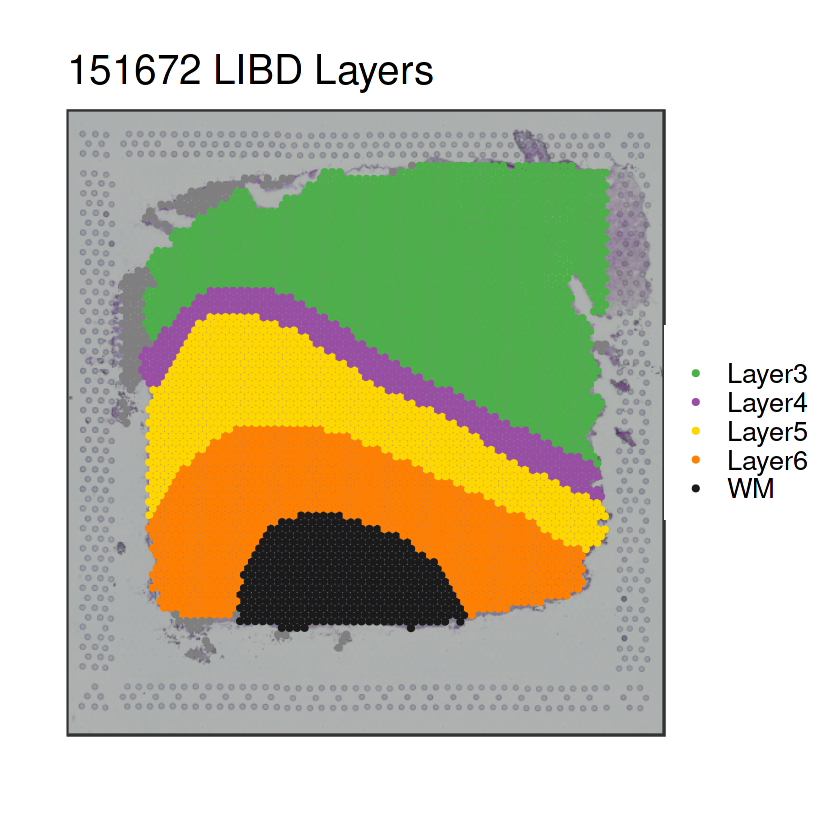

In [23]:
sample_id = "151672"
plot_save <- vis_clus(
    spe = spe_all,
    spatial = TRUE,
    clustervar = "layer_guess_reordered",
    sampleid = sample_id,
    colors = libd_layer_colors,
    ... = " LIBD Layers"
)
# plot_save <- DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.5)
plot_save
# ggsave(paste0('Ground_',sample_id,'.png'),plot_save)

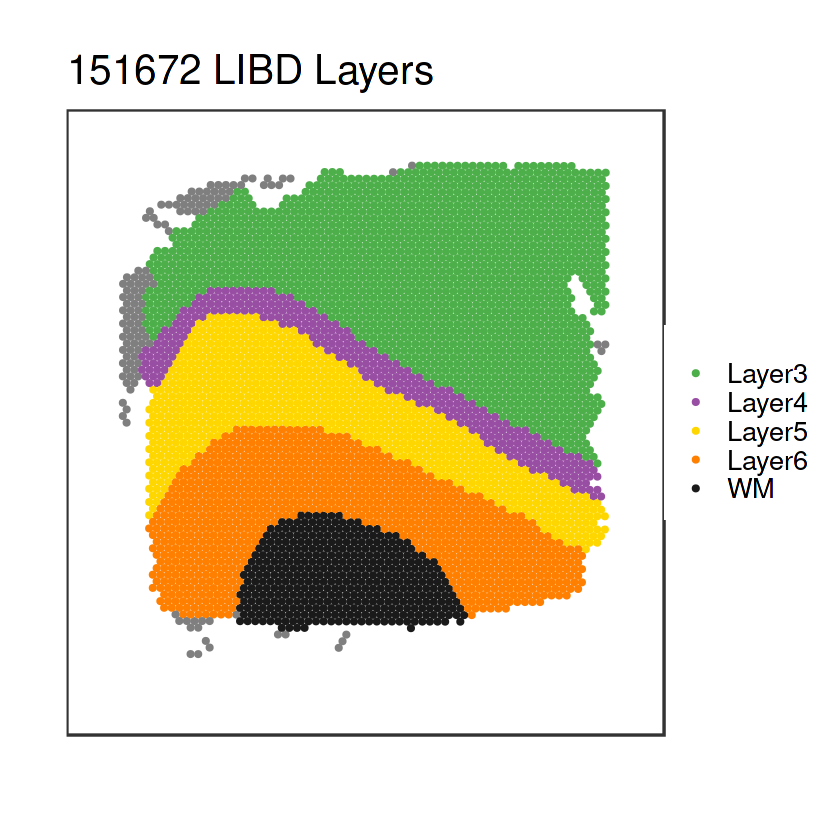

In [22]:
sample_id = "151672"
plot_save <- vis_clus(
    spe = spe_all,
    spatial = FALSE,
    clustervar = "layer_guess_reordered",
    sampleid = sample_id,
    colors = libd_layer_colors,
    ... = " LIBD Layers"
)
# plot_save <- DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.5)
plot_save
# ggsave(paste0('Ground_',sample_id,'.png'),plot_save)

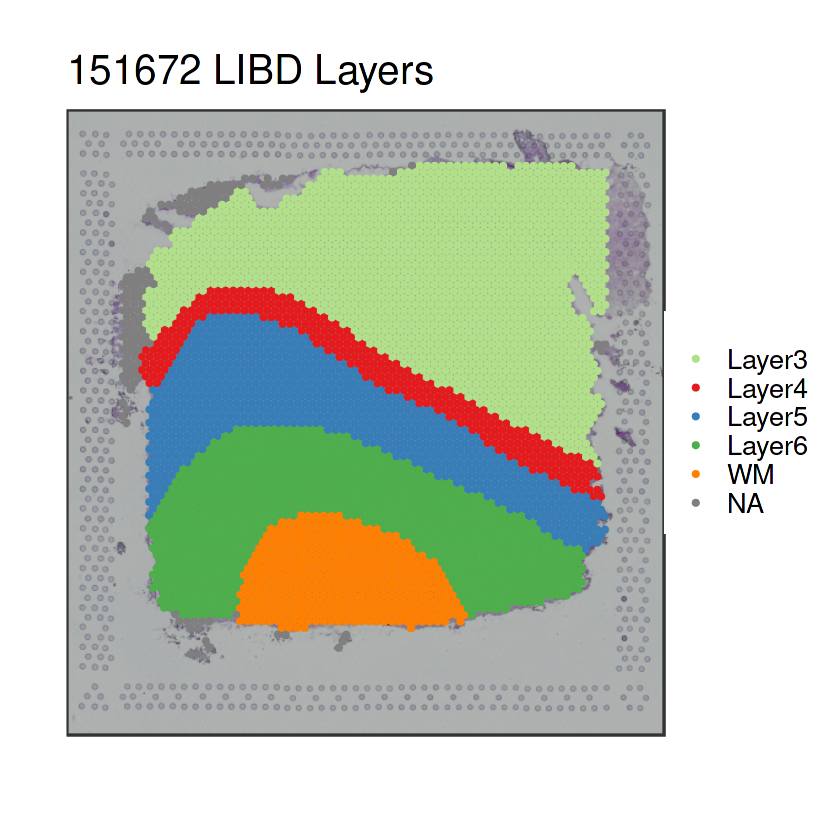

In [19]:
vis_clus(
    spe = spe_all,
    clustervar = "layer_guess_reordered",
    sampleid = "151672",
    # colors = libd_layer_colors,
    ... = " LIBD Layers"
)

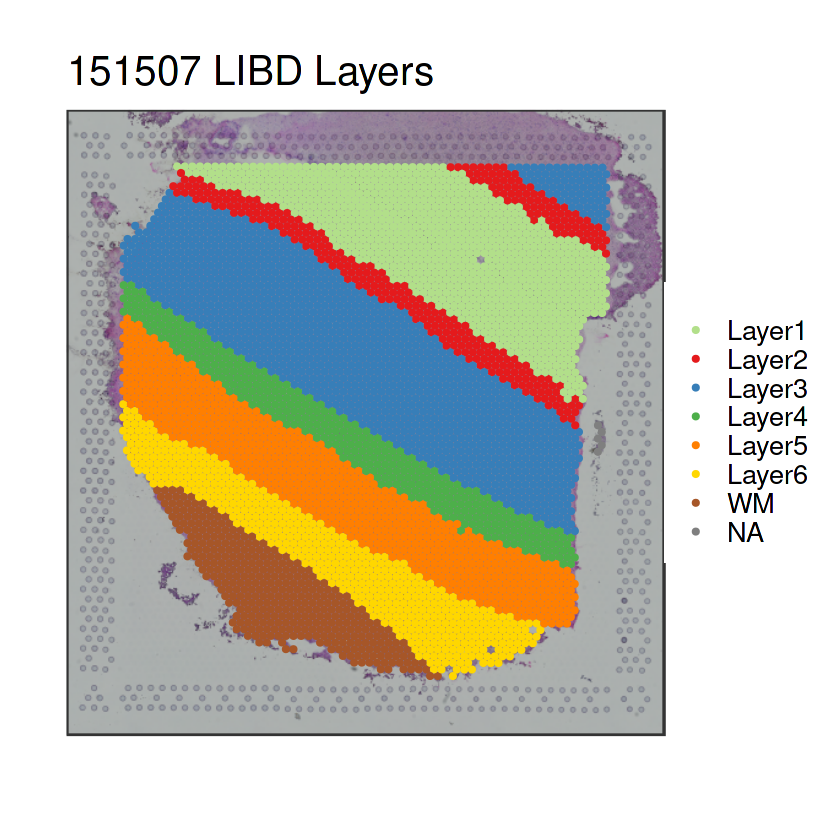

In [20]:
vis_clus(
    spe = spe_all,
    clustervar = "layer_guess_reordered",
    sampleid = "151507",
    # colors = libd_layer_colors,
    ... = " LIBD Layers"
)

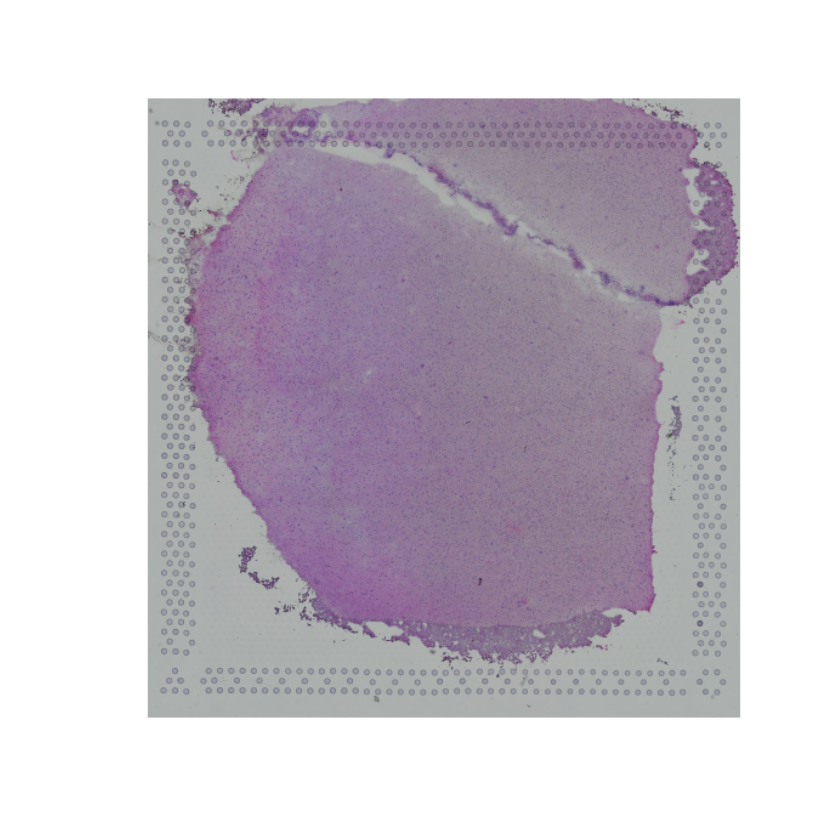

In [41]:
layer = '151507'
img <- imgRaster(spe_all, sample_id=layer, image_id='lowres')
frame_lims <- frame_limits(spe_all, sampleid=layer, image_id = 'lowres')
img <- img[frame_lims$y_min:frame_lims$y_max, frame_lims$x_min:frame_lims$x_max]
adjust <- list(x = frame_lims$x_min, y = frame_lims$y_min)
plot(img)

In [11]:
unique(colData(spe_all)[['sample_id']])

[1] "151507" "151508" "151509" "151510" "151669" "151670" "151671" "151672"
 [9] "151673" "151674" "151675" "151676"

In [42]:
spe_507 <- spe_all[, spe_all$sample_id == '151507']
spe_672 <- spe_all[, spe_all$sample_id == '151672']
spe_673 <- spe_all[, spe_all$sample_id == '151673']

In [56]:
colnames(colData(spe_all))

[1] "sample_id"                   "Cluster"                    
 [3] "sum_umi"                     "sum_gene"                   
 [5] "subject"                     "position"                   
 [7] "replicate"                   "subject_position"           
 [9] "discard"                     "key"                        
[11] "cell_count"                  "SNN_k50_k4"                 
[13] "SNN_k50_k5"                  "SNN_k50_k6"                 
[15] "SNN_k50_k7"                  "SNN_k50_k8"                 
[17] "SNN_k50_k9"                  "SNN_k50_k10"                
[19] "SNN_k50_k11"                 "SNN_k50_k12"                
[21] "SNN_k50_k13"                 "SNN_k50_k14"                
[23] "SNN_k50_k15"                 "SNN_k50_k16"                
[25] "SNN_k50_k17"                 "SNN_k50_k18"                
[27] "SNN_k50_k19"                 "SNN_k50_k20"                
[29] "SNN_k50_k21"                 "SNN_k50_k22"                
[31] "SNN_k50_k23"                 "SNN_k50_k24"                
[33] "SNN_k50_k25"                 "SNN_k50_k26"                
[35] "SNN_k50_k27"                 "SNN_k50_k28"                
[37] "GraphBased"                  "Maynard"                    
[39] "Martinowich"                 "layer_guess"                
[41] "layer_guess_reordered"       "layer_guess_reordered_short"
[43] "expr_chrM"                   "expr_chrM_ratio"            
[45] "SpatialDE_PCA"               "SpatialDE_pool_PCA"         
[47] "HVG_PCA"                     "pseudobulk_PCA"             
[49] "markers_PCA"                 "SpatialDE_UMAP"             
[51] "SpatialDE_pool_UMAP"         "HVG_UMAP"                   
[53] "pseudobulk_UMAP"             "markers_UMAP"               
[55] "SpatialDE_PCA_spatial"       "SpatialDE_pool_PCA_spatial" 
[57] "HVG_PCA_spatial"             "pseudobulk_PCA_spatial"     
[59] "markers_PCA_spatial"         "SpatialDE_UMAP_spatial"     
[61] "SpatialDE_pool_UMAP_spatial" "HVG_UMAP_spatial"           
[63] "pseudobulk_UMAP_spatial"     "markers_UMAP_spatial"       
[65] "spatialLIBD"                 "ManualAnnotation"           
[67] "in_tissue"                   "array_row"                  
[69] "array_col"

In [49]:
colData(spe_507)[['null_cont']] <- 0

In [64]:
spe_all[, spe_all$sample_id == '151507']$zero_cont <- 2

In [66]:
colnames(colData(spe_all[, spe_all$sample_id == '151507']))

[1] "sample_id"                   "Cluster"                    
 [3] "sum_umi"                     "sum_gene"                   
 [5] "subject"                     "position"                   
 [7] "replicate"                   "subject_position"           
 [9] "discard"                     "key"                        
[11] "cell_count"                  "SNN_k50_k4"                 
[13] "SNN_k50_k5"                  "SNN_k50_k6"                 
[15] "SNN_k50_k7"                  "SNN_k50_k8"                 
[17] "SNN_k50_k9"                  "SNN_k50_k10"                
[19] "SNN_k50_k11"                 "SNN_k50_k12"                
[21] "SNN_k50_k13"                 "SNN_k50_k14"                
[23] "SNN_k50_k15"                 "SNN_k50_k16"                
[25] "SNN_k50_k17"                 "SNN_k50_k18"                
[27] "SNN_k50_k19"                 "SNN_k50_k20"                
[29] "SNN_k50_k21"                 "SNN_k50_k22"                
[31] "SNN_k50_k23"                 "SNN_k50_k24"                
[33] "SNN_k50_k25"                 "SNN_k50_k26"                
[35] "SNN_k50_k27"                 "SNN_k50_k28"                
[37] "GraphBased"                  "Maynard"                    
[39] "Martinowich"                 "layer_guess"                
[41] "layer_guess_reordered"       "layer_guess_reordered_short"
[43] "expr_chrM"                   "expr_chrM_ratio"            
[45] "SpatialDE_PCA"               "SpatialDE_pool_PCA"         
[47] "HVG_PCA"                     "pseudobulk_PCA"             
[49] "markers_PCA"                 "SpatialDE_UMAP"             
[51] "SpatialDE_pool_UMAP"         "HVG_UMAP"                   
[53] "pseudobulk_UMAP"             "markers_UMAP"               
[55] "SpatialDE_PCA_spatial"       "SpatialDE_pool_PCA_spatial" 
[57] "HVG_PCA_spatial"             "pseudobulk_PCA_spatial"     
[59] "markers_PCA_spatial"         "SpatialDE_UMAP_spatial"     
[61] "SpatialDE_pool_UMAP_spatial" "HVG_UMAP_spatial"           
[63] "pseudobulk_UMAP_spatial"     "markers_UMAP_spatial"       
[65] "spatialLIBD"                 "ManualAnnotation"           
[67] "in_tissue"                   "array_row"                  
[69] "array_col"                   "zero_cont"

In [69]:
table(spe_all$zero_cont)


    1     2 
43455  4226 

In [59]:
length(colData(spe_all)[['zero_cont']])

[1] 47681

In [67]:
sum(colData(spe_all)[['zero_cont']])

[1] 51907

In [61]:
colnames(colData(spe_all))

[1] "sample_id"                   "Cluster"                    
 [3] "sum_umi"                     "sum_gene"                   
 [5] "subject"                     "position"                   
 [7] "replicate"                   "subject_position"           
 [9] "discard"                     "key"                        
[11] "cell_count"                  "SNN_k50_k4"                 
[13] "SNN_k50_k5"                  "SNN_k50_k6"                 
[15] "SNN_k50_k7"                  "SNN_k50_k8"                 
[17] "SNN_k50_k9"                  "SNN_k50_k10"                
[19] "SNN_k50_k11"                 "SNN_k50_k12"                
[21] "SNN_k50_k13"                 "SNN_k50_k14"                
[23] "SNN_k50_k15"                 "SNN_k50_k16"                
[25] "SNN_k50_k17"                 "SNN_k50_k18"                
[27] "SNN_k50_k19"                 "SNN_k50_k20"                
[29] "SNN_k50_k21"                 "SNN_k50_k22"                
[31] "SNN_k50_k23"                 "SNN_k50_k24"                
[33] "SNN_k50_k25"                 "SNN_k50_k26"                
[35] "SNN_k50_k27"                 "SNN_k50_k28"                
[37] "GraphBased"                  "Maynard"                    
[39] "Martinowich"                 "layer_guess"                
[41] "layer_guess_reordered"       "layer_guess_reordered_short"
[43] "expr_chrM"                   "expr_chrM_ratio"            
[45] "SpatialDE_PCA"               "SpatialDE_pool_PCA"         
[47] "HVG_PCA"                     "pseudobulk_PCA"             
[49] "markers_PCA"                 "SpatialDE_UMAP"             
[51] "SpatialDE_pool_UMAP"         "HVG_UMAP"                   
[53] "pseudobulk_UMAP"             "markers_UMAP"               
[55] "SpatialDE_PCA_spatial"       "SpatialDE_pool_PCA_spatial" 
[57] "HVG_PCA_spatial"             "pseudobulk_PCA_spatial"     
[59] "markers_PCA_spatial"         "SpatialDE_UMAP_spatial"     
[61] "SpatialDE_pool_UMAP_spatial" "HVG_UMAP_spatial"           
[63] "pseudobulk_UMAP_spatial"     "markers_UMAP_spatial"       
[65] "spatialLIBD"                 "ManualAnnotation"           
[67] "in_tissue"                   "array_row"                  
[69] "array_col"                   "zero_cont"

In [39]:
for (layer in layers){
    img <- imgRaster(spe_all, sample_id=layer, image_id='lowres')
    frame_lims <- frame_limits(spe_all, sampleid=layer, image_id = 'lowres')
    img <- img[frame_lims$y_min:frame_lims$y_max, frame_lims$x_min:frame_lims$x_max]
    adjust <- list(x = frame_lims$x_min, y = frame_lims$y_min)
    # png(file = paste0('hne_',layer,'.png'),width=600,height=600)
    # plot(img)
    # dev.off()
}

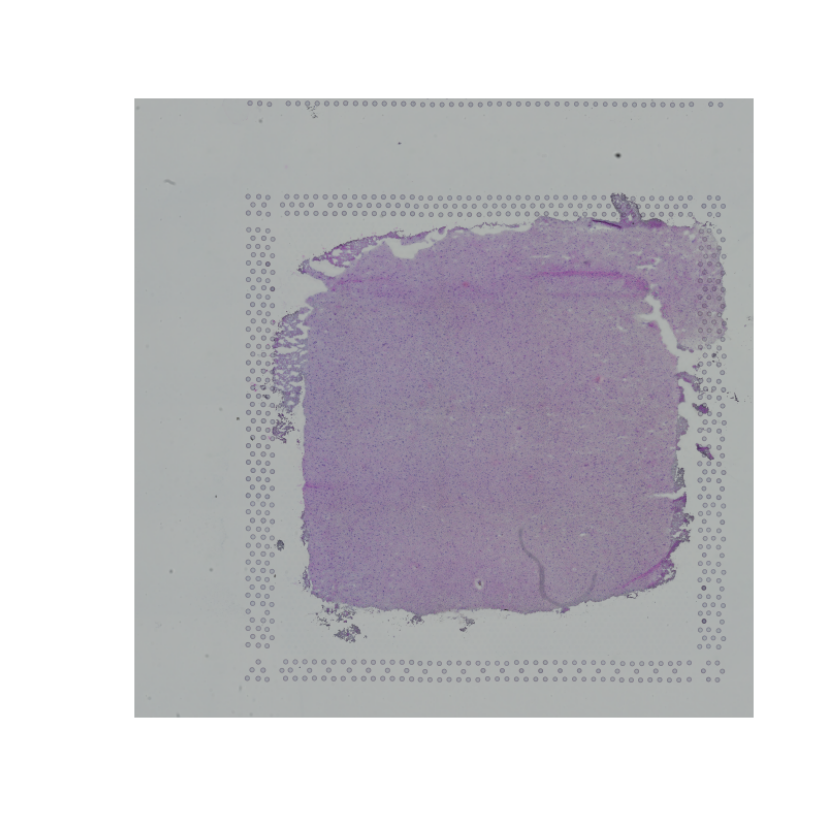

In [35]:
plot(img)

In [38]:
layers

[1] 151507 151508 151509 151510 151669 151670 151671 151672 151673 151674
[11] 151675 151676
12 Levels: 151507 151508 151509 151510 151669 151670 151671 151672 ... 151676

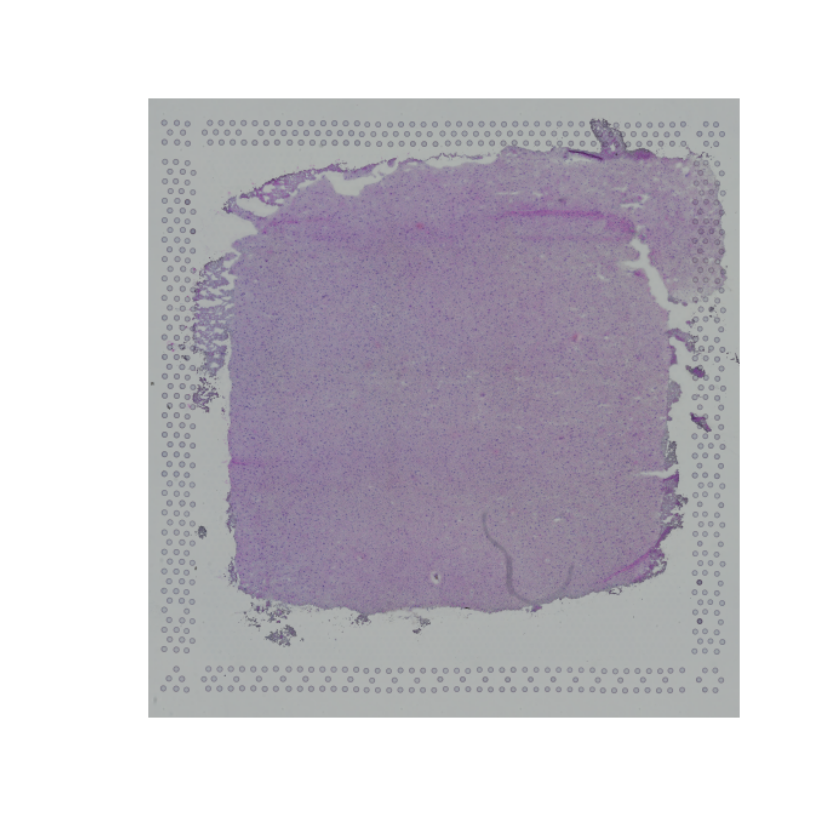

In [37]:
plot(img)

In [33]:
png(file = 'hne_507.png',width=600,height=600)
plot(img)
dev.off()

png 
  2

In [32]:
df_img <- as.data.frame(img)

ERROR while rich displaying an object: Error in m[i, , drop = FALSE]: subscript out of bounds

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.data.frame(obj)
8. ellip_limit_arr(obj, r

In [ ]:
ggplot(d,
       aes(
           x = pxl_col_in_fullres * SpatialExperiment::scaleFactors(spe, sample_id = sampleid, image_id = image_id) - adjust$x,
           y = pxl_row_in_fullres * SpatialExperiment::scaleFactors(spe, sample_id = sampleid, image_id = image_id) - adjust$y,
           fill = factor(!!sym('layer_guess_reordered')),
           key = key)
       )

In [35]:
df_test_507 <- as.data.frame(cbind(head(colData(spe_507)), head(spatialCoords(spe_507)), optional=TRUE))

In [36]:
df_test_507

sample_id Cluster sum_umi sum_gene subject position
AAACAACGAATAGTTC-1 151507    6        948     727     Br5292  0       
AAACAAGTATCTCCCA-1 151507    3       4261    2170     Br5292  0       
AAACAATCTACTAGCA-1 151507    2       1969    1093     Br5292  0       
AAACACCAATAACTGC-1 151507    5       3368    1896     Br5292  0       
AAACAGCTTTCAGAAG-1 151507    1       2981    1620     Br5292  0       
AAACAGGGTCTATATT-1 151507    2       4114    2135     Br5292  0       
                   replicate subject_position discard key                      
AAACAACGAATAGTTC-1 1         Br5292_pos0      FALSE   151507_AAACAACGAATAGTTC-1
AAACAAGTATCTCCCA-1 1         Br5292_pos0      FALSE   151507_AAACAAGTATCTCCCA-1
AAACAATCTACTAGCA-1 1         Br5292_pos0      FALSE   151507_AAACAATCTACTAGCA-1
AAACACCAATAACTGC-1 1         Br5292_pos0      FALSE   151507_AAACACCAATAACTGC-1
AAACAGCTTTCAGAAG-1 1         Br5292_pos0      FALSE   151507_AAACAGCTTTCAGAAG-1
AAACAGGGTCTATATT-1 1         Br5292_pos0      FALSE   151507_AAACAGGGTCTATATT-1
                   ⋯ pseudobulk_UMAP_spatial markers_UMAP_spatial spatialLIBD
AAACAACGAATAGTTC-1 ⋯ 1                       1                    L1         
AAACAAGTATCTCCCA-1 ⋯ 2                       1                    L3         
AAACAATCTACTAGCA-1 ⋯ 1                       6                    L1         
AAACACCAATAACTGC-1 ⋯ 8                       1                    WM         
AAACAGCTTTCAGAAG-1 ⋯ 1                       1                    L6         
AAACAGGGTCTATATT-1 ⋯ 5                       1                    L6         
                   ManualAnnotation in_tissue array_row array_col
AAACAACGAATAGTTC-1 NA               TRUE       0         16      
AAACAAGTATCTCCCA-1 NA               TRUE      50        102      
AAACAATCTACTAGCA-1 NA               TRUE       3         43      
AAACACCAATAACTGC-1 NA               TRUE      59         19      
AAACAGCTTTCAGAAG-1 NA               TRUE      43          9      
AAACAGGGTCTATATT-1 NA               TRUE      47         13      
                   pxl_col_in_fullres pxl_row_in_fullres optional
AAACAACGAATAGTTC-1 3276               2514               TRUE    
AAACAAGTATCTCCCA-1 9178               8520               TRUE    
AAACAATCTACTAGCA-1 5133               2878               TRUE    
AAACACCAATAACTGC-1 3462               9581               TRUE    
AAACAGCTTTCAGAAG-1 2779               7663               TRUE    
AAACAGGGTCTATATT-1 3053               8143               TRUE

In [15]:
count_507 <- assays(spe_507)[['logcounts']]
coord_507 <- spatialCoords(spe_507)
count_672 <- assays(spe_672)[['logcounts']]
coord_672 <- spatialCoords(spe_672)
count_673 <- assays(spe_673)[['logcounts']]
coord_673 <- spatialCoords(spe_673)

In [16]:
# rowData(spe_507)[['gene_name']]

In [9]:
saveRDS(count_507,'dataset/logcount_507.rds')
saveRDS(count_672,'dataset/logcount_672.rds')
saveRDS(count_673,'dataset/logcount_673.rds')
saveRDS(coord_507,'dataset/coord_507.rds')
saveRDS(coord_672,'dataset/coord_672.rds')
saveRDS(coord_673,'dataset/coord_673.rds')

<h2>Saving as dataframe one by one</h2>

In [ ]:
## repeat for 507,672,and 673
# tes <- readRDS('dataset/logcount_673.rds')
# to_save <- as.data.frame(tes)
# saveRDS(to_save,'dataset/df_logcount_673.rds')

In [17]:
dataRead_507 <- readRDS('dataset/logcount_507.rds')
dfRead_507 <- readRDS('dataset/df_logcount_507.rds')

In [22]:
dataRead_672 <- readRDS('dataset/logcount_672.rds')
dfRead_672 <- readRDS('dataset/df_logcount_672.rds')

In [20]:
dfDirect_507 <- as.data.frame(count_507)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.1 GiB”


In [23]:
dfDirect_672 <- as.data.frame(count_672)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.0 GiB”


In [18]:
identical(count_507, dataRead_507)

[1] TRUE

In [21]:
identical(dfDirect_507, dfRead_507)

[1] TRUE

In [24]:
identical(dfDirect_672, dfRead_672)

[1] TRUE

In [5]:
D1 <- read.table("dataset/DATA1_MAT.txt", sep='\t', row.names=1, header=T)
D2 <- read.table("dataset/DATA2_MAT.txt", sep='\t', row.names=1, header=T)

In [6]:
colnames(D1)=paste0('D1_', colnames(D1))
colnames(D2)=paste0('D2_', colnames(D2))

In [7]:
DATA=.simple_combine(D1,D2)$combine
BATCH=rep('D2',ncol(DATA))
BATCH[c(1:ncol(D1))]='D1'

In [8]:
mybeer=BEER(DATA, BATCH, GNUM=30, PCNUM=50, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE, RMG=NULL) 

[1] "BEER start!"
[1] "2023-06-12 14:37:01 KST"


Loading required package: stringi



[1] "Group number (GNUM) is:"
[1] 30
[1] "Varible gene number (GN) of each batch is:"
[1] 2000
[1] "ROUND is:"
[1] 1
[1] 1
[1] "D1"
[1] 2
[1] "D2"
[1] "Total varible gene number (GN) is:"
[1] 2551
Found 8 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  OLR1 
Negative:  GPM6B 

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:37:10 UMAP embedding parameters a = 0.9922 b = 1.112

14:37:10 Read 2086 rows and found 50 numeric columns

14:37:10 Using Annoy for neighbor search, n_neighbors = 30

14:37:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:37:10 Writing NN index file to temp file /tmp/RtmpmM0XIX/file2321846044c9d

14:37:10 Searching Annoy index using 1 thread, search_k = 3000

14:37:10 Annoy recall = 100%

14:37:11 Commencing smooth kNN distance calibrati

[1] "Get group for:"
[1] "D1"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D2"
[1] "Group Number:"
[1] 30
[1] "Finding MN pairs..."
[1] "1 / 60"
[1] "ROUND:"
[1] 1
[1] "Number of MN pairs:"
[1] 6
[1] "Evaluating PCs ..."
[1] "Start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] "Finished!!!"
[1] "############################################################################"
[1] "BEER cheers !!! All main steps finished."
[1] "############################################################################"
[1] "2023-06-12 14:37:14 KST"


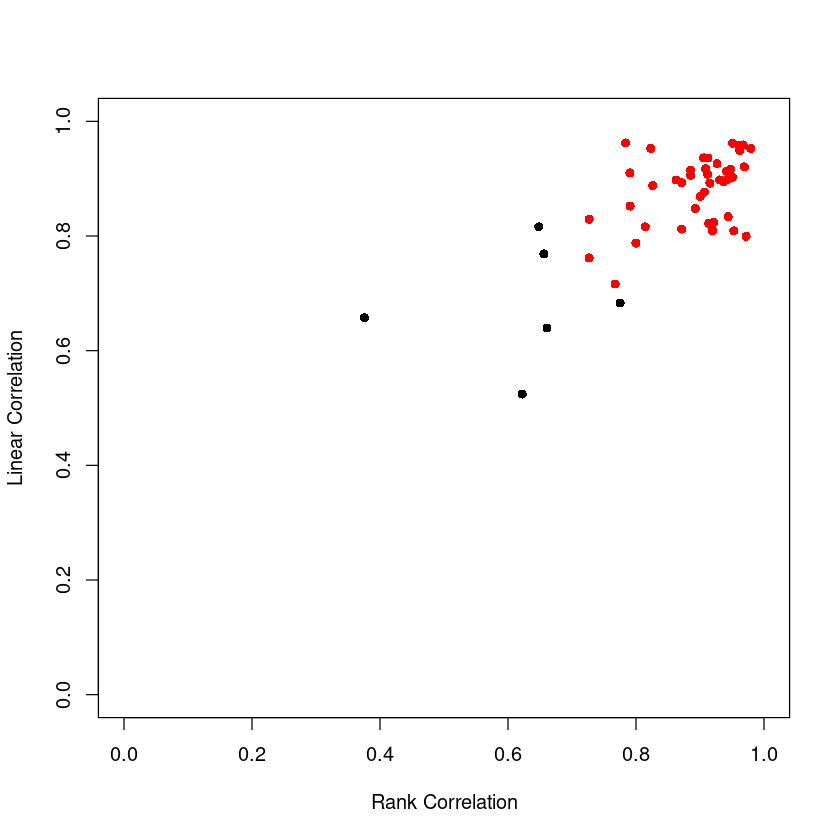

In [9]:
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

[1] "CCL3"           "FOS"            "CCL4"           "RGS1"          
   [5] "CCL4L1"         "CCL4L2"         "CCL3L1"         "SPP1"          
   [9] "CD74"           "CH25H"          "CCL3L3"         "C1QB"          
  [13] "SRGN"           "MAG"            "RPL21"          "EGR1"          
  [17] "IL1B"           "HSPA6"          "APOE"           "C1QC"          
  [21] "LAPTM5"         "OPALIN"         "IL8"            "P2RY12"        
  [25] "CSF1R"          "KLK6"           "ERMN"           "HLA-DRA"       
  [29] "RNASE1"         "ENPP2"          "PDK4"           "A2M"           
  [33] "CXCR4"          "CD83"           "C3"             "FOLR2"         
  [37] "CNDP1"          "CCL2"           "MIR4441"        "CRYAB"         
  [41] "CD69"           "TYROBP"         "CA2"            "OLR1"          
  [45] "C1QA"           "CCL8"           "ALDOC"          "CX3CR1"        
  [49] "MAL"            "TNFSF18"        "C3AR1"          "FCER1G"        
  [53] "TREM2"          "TMEM144"        "VSIG4"          "SFRP2"         
  [57] "SEPP1"          "SERPINA3"       "CXCL13"         "RPL21P28"      
  [61] "TMEM125"        "PBK"            "CD14"           "DUSP1"         
  [65] "PLD4"           "ZFP36"          "GJB1"           "HSPA1B"        
  [69] "GPR37"          "NINJ2"          "BCAN"           "SLCO2B1"       
  [73] "GPR34"          "CD53"           "FPR1"           "SELPLG"        
  [77] "HSPA1A"         "ADORA3"         "HLA-DPA1"       "C1orf54"       
  [81] "OSM"            "BCL2A1"         "PTTG1"          "TMEM176A"      
  [85] "G0S2"           "NFKBID"         "PLP1"           "JUNB"          
  [89] "SRPX"           "FAM212A"        "CSRP1"          "APOC2"         
  [93] "SAT1"           "GSN"            "HSPB8"          "SOWAHD"        
  [97] "MOBP"           "NR4A1"          "RBP4"           "RNASE6"        
 [101] "LYVE1"          "FOLH1"          "TNF"            "ARHGDIB"       
 [105] "RNASE4"         "LGALS3"         "MIR4737"        "ART3"          
 [109] "PLAU"           "CASP4"          "TPPP3"          "AIF1"          
 [113] "SNORD29"        "PTGDS"          "LILRA4"         "HLA-DMB"       
 [117] "RBP7"           "DKK1"           "RTP4"           "ADM"           
 [121] "FCGR1A"         "OLFML3"         "SUSD3"          "SPARCL1"       
 [125] "SYCE3"          "ALOX5AP"        "SELENBP1"       "S100A11"       
 [129] "AURKB"          "ID1"            "TK1"            "GPR183"        
 [133] "PPAP2C"         "CDK1"           "PMAIP1"         "EGR2"          
 [137] "GIMAP2"         "IER3"           "CBR1"           "PLXDC2"        
 [141] "SLC6A13"        "EPHX4"          "CYTL1"          "APOC1"         
 [145] "GPR84"          "ACY3"           "CALB2"          "CXCL2"         
 [149] "MGC39372"       "BST2"           "DHRS3"          "LILRB4"        
 [153] "UBB"            "BIRC5"          "PRSS35"         "C8orf48"       
 [157] "CSRP2"          "HHIP-AS1"       "SLC5A11"        "PCP4"          
 [161] "DNAJB1"         "ADAM28"         "RGS10"          "SNORD77"       
 [165] "MIR3650"        "DHRS9"          "FCGR3A"         "ASPA"          
 [169] "CDKN3"          "ITM2A"          "VIM"            "S100A8"        
 [173] "IGFBP7"         "CD40"           "FOLR1"          "PMP22"         
 [177] "MIRLET7A2"      "PLEKHF1"        "SUCNR1"         "GIMAP4"        
 [181] "CAMK1G"         "MBP"            "AGPAT2"         "CD37"          
 [185] "PLA2G16"        "GFAP"           "RARRES3"        "CASP1"         
 [189] "APOD"           "DBNDD2"         "JUN"            "LOC728819"     
 [193] "SNORD68"        "HSD11B1"        "SLC2A5"         "GSC"           
 [197] "C10orf35"       "SEPT4"          "HLA-DMA"        "OVOL1"         
 [201] "MT1F"           "IRF8"           "CLIC1"          "PTHLH"         
 [205] "LY86"           "VAMP5"          "HTATIP2"        "NINJ1"         
 [209] "ITGB2"          "RTP1"           "SNORD98"        "STEAP1B"       
 [213] "SNORD49A"       "HSD

Centering and scaling data matrix

PC_ 1 
Positive:  C1QC 
Negative:  GPM6A 

14:38:44 UMAP embedding parameters a = 0.9922 b = 1.112

14:38:44 Read 2086 rows and found 50 numeric columns

14:38:44 Using Annoy for neighbor search, n_neighbors = 30

14:38:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:38:44 Writing NN index file to temp file /tmp/RtmpmM0XIX/file2321867556aa7

14:38:44 Searching Annoy index using 1 thread, search_k = 3000

14:38:45 Annoy recall = 100%

14:38:45 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:38:46 Initializing from normalized Laplacian + noise (using irlba)

14:38:46 Commencing optimization for 500 epochs, with 89038 positive edges

14:38:47 Optimization finished



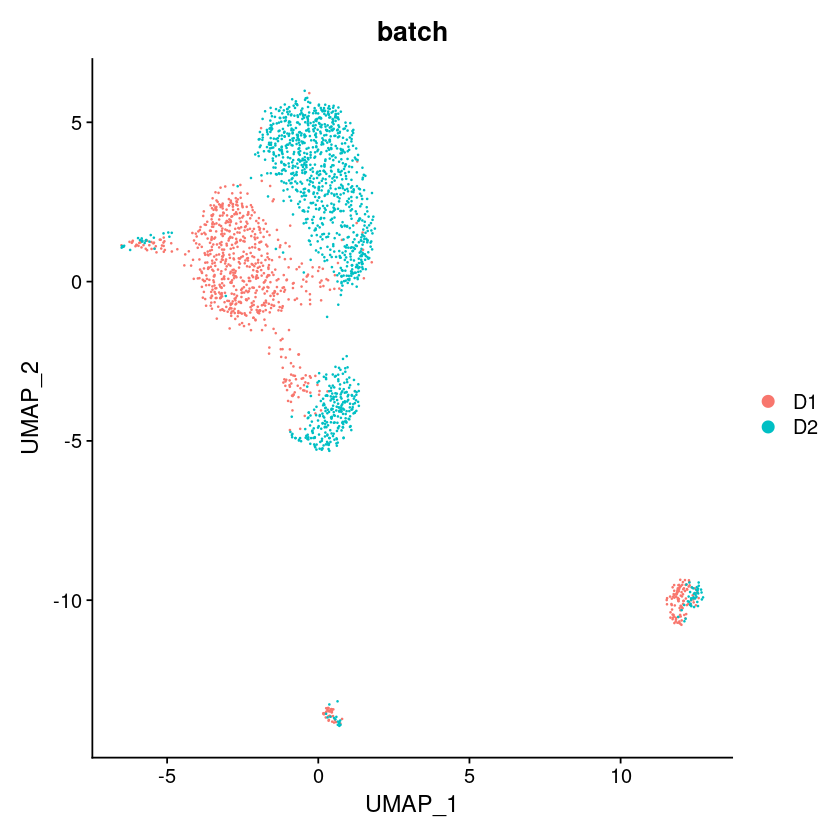

In [10]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2)
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

Warning message:
“The following arguments are not used: check_duplicates”
14:39:09 UMAP embedding parameters a = 0.9922 b = 1.112

14:39:09 Read 2086 rows and found 44 numeric columns

14:39:09 Using Annoy for neighbor search, n_neighbors = 30

14:39:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:39:10 Writing NN index file to temp file /tmp/RtmpmM0XIX/file2321824d2fef6

14:39:10 Searching Annoy index using 1 thread, search_k = 3000

14:39:10 Annoy recall = 100%

14:39:10 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:39:11 Initializing from normalized Laplacian + noise (using irlba)

14:39:11 Commencing optimization for 500 epochs, with 91928 positive edges

14:39:13 Optimization finished



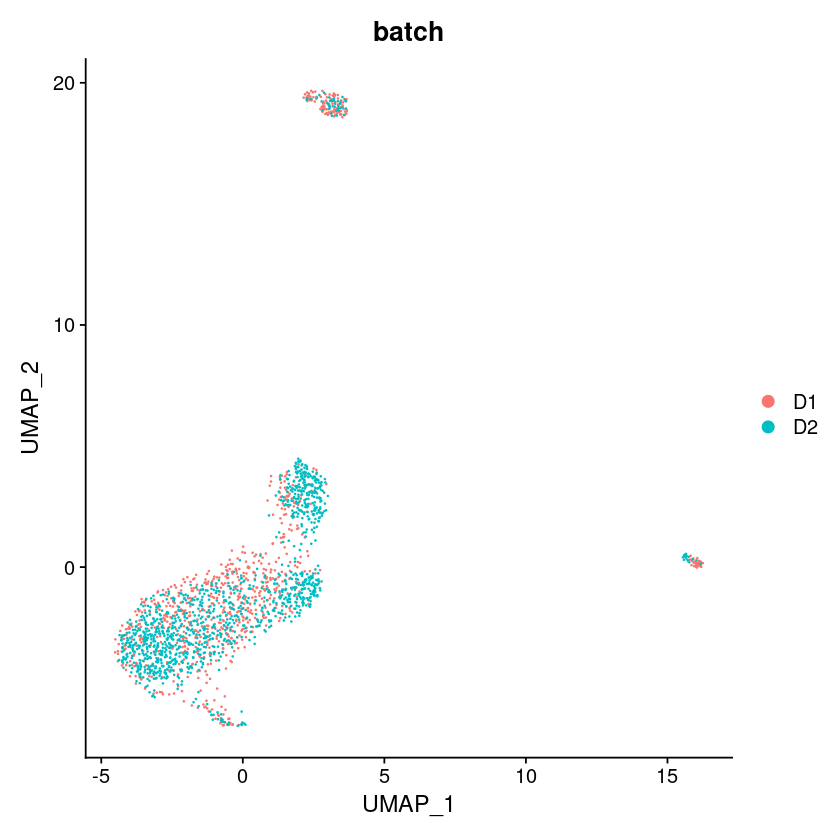

In [11]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, check_duplicates=FALSE)

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1) 

In [4]:
# D1=readRDS('/home/spatial_integration/spatialLIBD/r_lib/assay_151507.rds')
# D2=readRDS('spatialLIBD/r_lib/assay_151672.rds')
# D3=readRDS('spatialLIBD/r_lib/assay_151673.rds')

# BATCH=c(rep('D1',ncol(D1)),
#         rep('D2',ncol(D2)),
#         rep('D3',ncol(D3)) )

# D12=.simple_combine(D1,D2)$combine
# D123=.simple_combine(D12,D3)$combine

# DATA = D123

# rm(D1);rm(D2);rm(D3);rm(D12)

In [14]:
D1 <- subset(D1, select= -index)
D1 <- subset(D1, select= -rownames)
D1

0        1         2        3        4        5        6        7        
1     0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
2     0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
3     0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
4     0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
5     0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
6     0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
7     0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
8     0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
9     0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
10    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
11    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
12    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
13    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
14    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
15    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
16    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
17    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
18    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
19    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
20    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
21    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
22    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
23    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
24    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
25    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
26    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
27    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.8025096
28    2.195668 0.8417394 0        1.050731 1.144705 0        0        0.8025096
29    0.000000 0.0000000 0        0.000000 0.000000 0        0        0.0000000
30    0.000000 0.0000000 0        0.000000 0.000000 0        0        1.3151401
...   ...      ...       ...      ...      ...      ...      ...      ...      
33509 4.240702 5.3437802 5.480828 4.554784 5.591839 4.956261 5.245872 5.138736 
33510 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33511 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33512 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33513 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33514 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33515 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33516 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33517 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33518 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33519 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33520 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33521 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33522 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33523 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33524 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33525 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33526 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
33527 

In [39]:
rownames(D1) <- rownames_fix$rownames
D1

0        1         2        3        4        5        6       
ENSG00000243485 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000237613 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000186092 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000238009 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000239945 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000239906 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000241599 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000236601 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000284733 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000235146 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000284662 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000229905 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000237491 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000177757 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000225880 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000230368 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000272438 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000230699 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000241180 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000223764 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000187634 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000188976 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000187961 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000187583 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000187642 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000272512 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000188290 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000187608 2.195668 0.8417394 0        1.050731 1.144705 0        0       
ENSG00000224969 0.000000 0.0000000 0        0.000000 0.000000 0        0       
ENSG00000188157 0.000000 0.0000000 0        0.000000 0.000000 0        0       
...             ...      ...       ...      ...      ...      ...      ...     
ENSG00000198727 4.240702 5.3437802 5.480828 4.554784 5.591839 4.956261 5.245872
ENSG00000274175 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000275869 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000273554 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000278782 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000277761 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000277836 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000277666 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000276760 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000275249 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000274792 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000278704 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000277400 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000274847 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000273496 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000276256 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000278198 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000273748 0.000000 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000276017 

In [38]:
D2

0         1        2        3        4        5       
ENSG00000243485 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000237613 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000186092 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000238009 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000239945 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000239906 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000241599 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000236601 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000284733 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000235146 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000284662 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000229905 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000237491 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000177757 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000225880 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000230368 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000272438 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000230699 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000241180 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000223764 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000187634 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000188976 0.0000000 0.00000  0.948332 0        0.627869 0       
ENSG00000187961 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000187583 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000187642 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000272512 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000188290 0.7850231 1.13783  0.000000 0        0.627869 0       
ENSG00000187608 1.2905658 0.00000  0.000000 0        0.000000 0       
ENSG00000224969 0.0000000 0.00000  0.000000 0        0.000000 0       
ENSG00000188157 0.7850231 0.00000  0.000000 0        0.000000 0       
...             ...       ...      ...      ...      ...      ...     
ENSG00000198727 5.861123  5.615296 5.356656 5.659874 5.230119 5.577906
ENSG00000274175 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000275869 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000273554 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000278782 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000277761 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000277836 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000277666 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000276760 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000275249 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000274792 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000278704 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000277400 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000274847 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000273496 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000276256 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000278198 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000273748 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000276017 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000278817 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000277196 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000277630 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000278384 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000278633 0.000000  0.000000 0.000000 0.000000 0.000000 0.000000
ENSG00000276345 0.000000  0.000000 0.000

In [40]:
rownames(D3) <- rownames_fix$rownames
D3

0         1        2         3        4         5       
ENSG00000243485 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000237613 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000186092 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000238009 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000239945 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000239906 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000241599 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000236601 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000284733 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000235146 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000284662 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000229905 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000237491 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000177757 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000225880 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000230368 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000272438 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000230699 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000241180 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000223764 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000187634 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000188976 0.0000000 0.00000  0.9662463 0        1.3184686 0       
ENSG00000187961 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000187583 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000187642 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000272512 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000188290 0.4655466 0.00000  0.0000000 0        0.0000000 0       
ENSG00000187608 0.0000000 0.00000  0.0000000 0        0.8048847 0       
ENSG00000224969 0.0000000 0.00000  0.0000000 0        0.0000000 0       
ENSG00000188157 0.4655466 2.26171  0.0000000 0        0.8048847 0       
...             ...       ...      ...       ...      ...       ...     
ENSG00000198727 5.186586  4.784984 4.792075  5.982477 4.8017910 4.978846
ENSG00000274175 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000275869 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000273554 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000278782 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000277761 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000277836 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000277666 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000276760 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000275249 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000274792 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000278704 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000277400 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000274847 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000273496 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000276256 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000278198 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000273748 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000276017 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000278817 0.000000  0.000000 0.000000  0.000000 0.8048847 0.000000
ENSG00000277196 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000277630 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
ENSG00000278384 0.000000  0.000000 0.000000  0.000000 0.0000000 0.000000
E

In [41]:
BATCH=c(rep('D1',ncol(D1)),
        rep('D2',ncol(D2)),
        rep('D3',ncol(D3)) )

D12=.simple_combine(D1,D2)$combine
D123=.simple_combine(D12,D3)$combine

DATA = D123

# rm(D1);rm(D2);rm(D3);rm(D12)

In [42]:
DATA

0   1         2   3   4        5         6        7        
ENSG00000000003 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000000005 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000000419 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000000457 0   0.0000000 0   0   0.000000 0.8240501 0.000000 0.0000000
ENSG00000000460 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000000938 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000000971 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000001036 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.8025096
ENSG00000001084 0   0.8417394 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000001167 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000001460 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000001461 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000001497 0   0.0000000 0   0   0.000000 0.0000000 1.382027 0.0000000
ENSG00000001561 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000001617 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000001626 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000001629 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000001630 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000001631 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000002016 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000002330 0   0.0000000 0   0   1.144705 0.0000000 1.382027 0.8025096
ENSG00000002549 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000002586 0   0.0000000 0   0   0.000000 1.3452476 2.074741 0.0000000
ENSG00000002587 0   0.0000000 0   0   1.144705 0.0000000 0.000000 0.0000000
ENSG00000002726 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000002745 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000002746 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000002822 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
ENSG00000002834 0   0.8417394 0   0   1.144705 0.0000000 0.000000 0.0000000
ENSG00000002919 0   0.0000000 0   0   0.000000 0.0000000 0.000000 0.0000000
...             ... ...       ... ... ...      ...       ...      ...      
ENSG00000285385 0   0         0   0   0        0         0        0        
ENSG00000285396 0   0         0   0   0        0         0        0        
ENSG00000285404 0   0         0   0   0        0         0        0        
ENSG00000285407 0   0         0   0   0        0         0        0        
ENSG00000285409 0   0         0   0   0        0         0        0        
ENSG00000285412 0   0         0   0   0        0         0        0        
ENSG00000285413 0   0         0   0   0        0         0        0        
ENSG00000285424 0   0         0   0   0        0         0        0        
ENSG00000285427 0   0         0   0   0        0         0        0        
ENSG00000285437 0   0         0   0   0        0         0        0        
ENSG00000285441 0   0         0   0   0        0         0        0        
ENSG00000285444 0   0         0   0   0        0         0        0        
ENSG00000285446 0   0         0   0   0        0         0        0        
ENSG00000285447 0   0         0   0   0        0         0        0        
ENSG00000285448 0   0         0   0   0        0         0        0        
ENSG00000285454 0   0         0   0   0        0         0        0        
ENSG00000285458 0   0         0   0   0        0         0        0        
ENSG00000285462 0   0         0   0   0        0         0        0        
ENSG00000285471 0   0         0   0   0        0         0        0        
ENSG00000285472 0   0         0   0   0        0         0        0        
ENSG00000285473 0   0         0   0   0        0         0      

In [43]:
length(BATCH)

[1] 33118

In [44]:
dim(D1)
dim(D2)
dim(D3)
dim(DATA)

[1] 33538 10327

[1] 33538 11048

[1] 33538 11743

[1] 33538 33118

In [17]:
DATA

AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 AAACAATCTACTAGCA-1
ENSG00000000003 0                  0.0000000          0                 
ENSG00000000005 0                  0.0000000          0                 
ENSG00000000419 0                  0.0000000          0                 
ENSG00000000457 0                  0.0000000          0                 
ENSG00000000460 0                  0.0000000          0                 
ENSG00000000938 0                  0.0000000          0                 
ENSG00000000971 0                  0.0000000          0                 
ENSG00000001036 0                  0.0000000          0                 
ENSG00000001084 0                  0.8417394          0                 
ENSG00000001167 0                  0.0000000          0                 
ENSG00000001460 0                  0.0000000          0                 
ENSG00000001461 0                  0.0000000          0                 
ENSG00000001497 0                  0.0000000          0                 
ENSG00000001561 0                  0.0000000          0                 
ENSG00000001617 0                  0.0000000          0                 
ENSG00000001626 0                  0.0000000          0                 
ENSG00000001629 0                  0.0000000          0                 
ENSG00000001630 0                  0.0000000          0                 
ENSG00000001631 0                  0.0000000          0                 
ENSG00000002016 0                  0.0000000          0                 
ENSG00000002330 0                  0.0000000          0                 
ENSG00000002549 0                  0.0000000          0                 
ENSG00000002586 0                  0.0000000          0                 
ENSG00000002587 0                  0.0000000          0                 
ENSG00000002726 0                  0.0000000          0                 
ENSG00000002745 0                  0.0000000          0                 
ENSG00000002746 0                  0.0000000          0                 
ENSG00000002822 0                  0.0000000          0                 
ENSG00000002834 0                  0.8417394          0                 
ENSG00000002919 0                  0.0000000          0                 
...             ...                ...                ...               
ENSG00000285385 0                  0                  0                 
ENSG00000285396 0                  0                  0                 
ENSG00000285404 0                  0                  0                 
ENSG00000285407 0                  0                  0                 
ENSG00000285409 0                  0                  0                 
ENSG00000285412 0                  0                  0                 
ENSG00000285413 0                  0                  0                 
ENSG00000285424 0                  0                  0                 
ENSG00000285427 0                  0                  0                 
ENSG00000285437 0                  0                  0                 
ENSG00000285441 0                  0                  0                 
ENSG00000285444 0                  0                  0                 
ENSG00000285446 0                  0                  0                 
ENSG00000285447 0                  0                  0                 
ENSG00000285448 0                  0                  0                 
ENSG00000285454 0                  0                  0                 
ENSG00000285458 0                  0                  0                 
ENSG00000285462 0                  0                  0                 
ENSG00000285471 0                  0                  0                 
ENSG00000285472 0                  0                  0                 
ENSG00000285473 0                  0                  0                 
ENSG00000285476 0                  0                  0                 
ENSG00000285480 0                  0                  0                 
E

In [45]:
mybeer=BEER(DATA, BATCH, GNUM=50, PCNUM=100, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE )

[1] "BEER start!"
[1] "2023-06-07 17:27:11 KST"


Loading required package: stringi



[1] "Group number (GNUM) is:"
[1] 50
[1] "Varible gene number (GN) of each batch is:"
[1] 2000
[1] "ROUND is:"
[1] 1
[1] 1
[1] "D1"
[1] 2
[1] "D2"
[1] 3
[1] "D3"
[1] "Total varible gene number (GN) is:"
[1] 3475


Warning message:
"Non-unique cell names (colnames) present in the input matrix, making unique"
Found3batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  ENSG00000198712 
Negative:  ENSG00000175084 



[1] "Get group for:"
[1] "D1"
[1] "Group Number:"
[1] 50
[1] "Get group for:"
[1] "D2"
[1] "Group Number:"
[1] 50
[1] "Get group for:"
[1] "D3"
[1] "Group Number:"
[1] 50
[1] "Finding MN pairs..."
[1] "1 / 150"
[1] "101 / 150"
[1] "ROUND:"
[1] 1
[1] "Number of MN pairs:"
[1] 52
[1] "Evaluating PCs ..."
[1] "Start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99


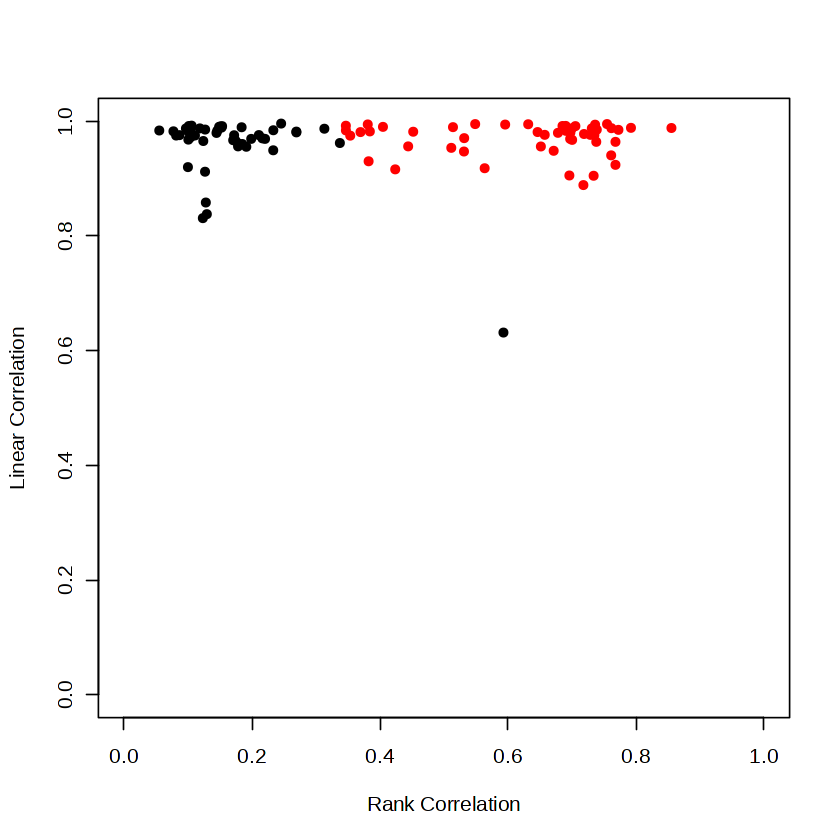

In [46]:
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

Warning message:
"Non-unique cell names (colnames) present in the input matrix, making unique"
Centering and scaling data matrix

PC_ 1 
Positive:  ENSG00000197971 
Negative:  ENSG00000133392 



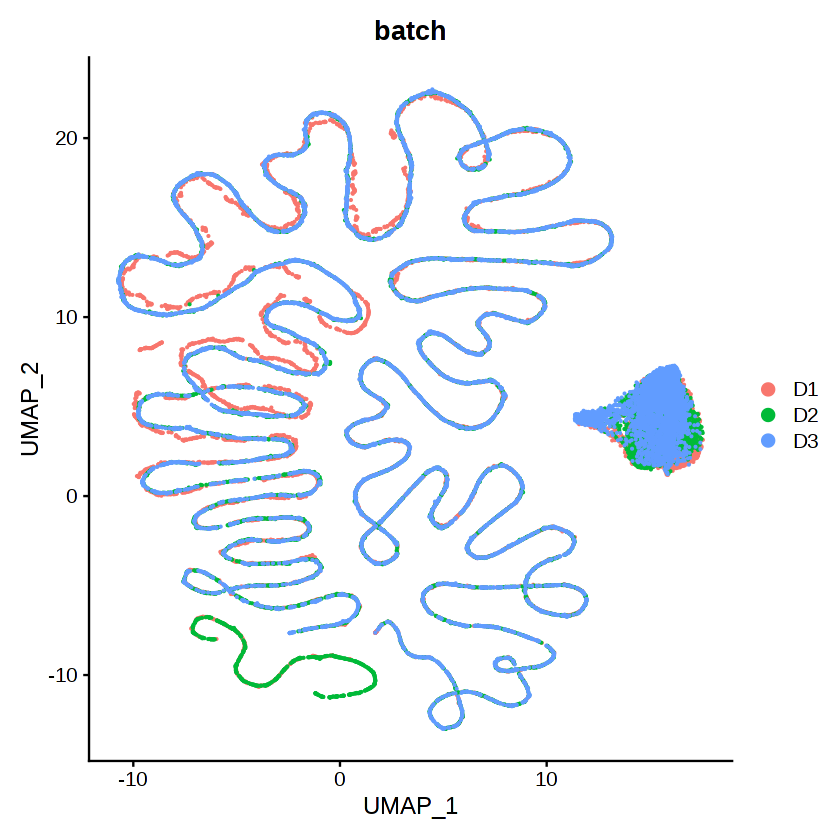

In [47]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”
Centering and scaling data matrix

PC_ 1 
Positive:  ENSG00000187094 
Negative:  ENSG00000168314 



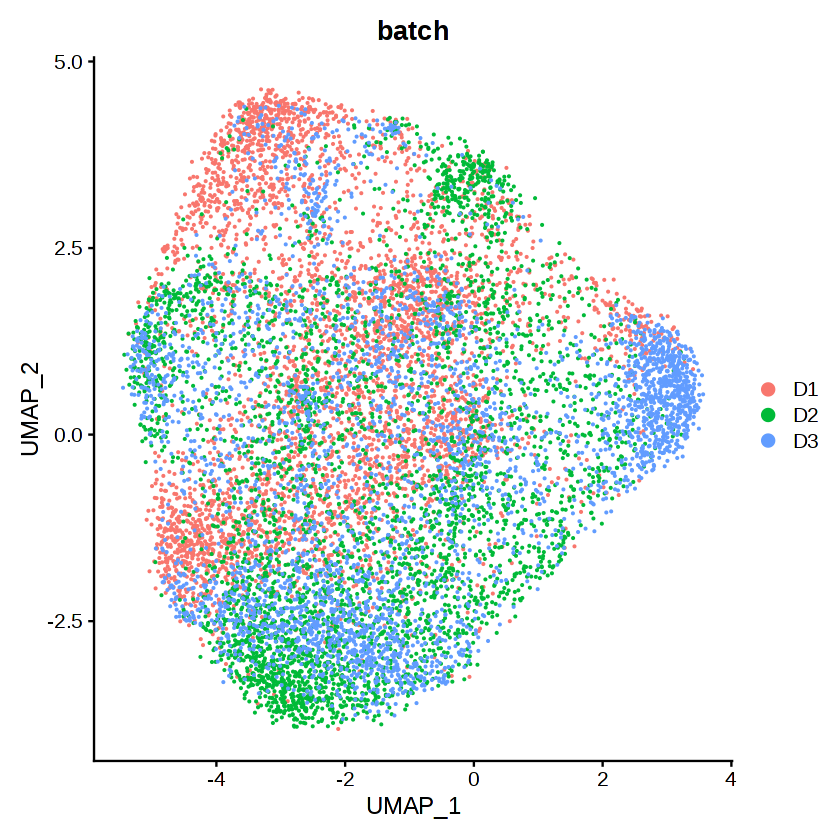

In [ ]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

In [48]:
plot_save <- DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1)
ggsave('plots/umap_plot_base2_0607.png',plot_save)

Saving 6.67 x 6.67 in image


Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”
Centering and scaling data matrix

PC_ 1 
Positive:  ENSG00000187094 
Negative:  ENSG00000168314 



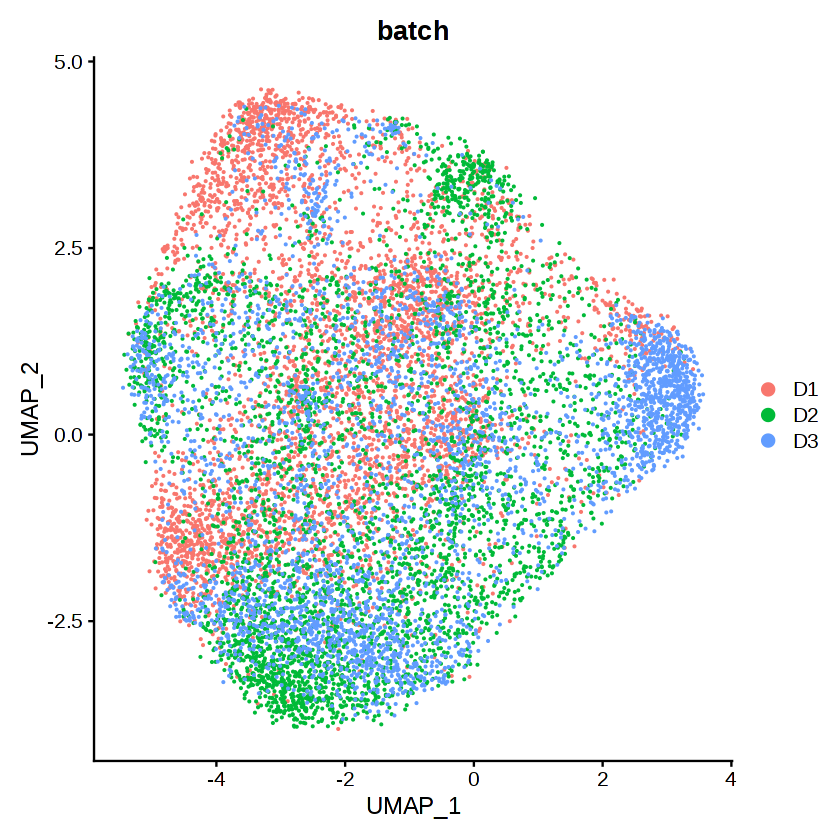

In [19]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

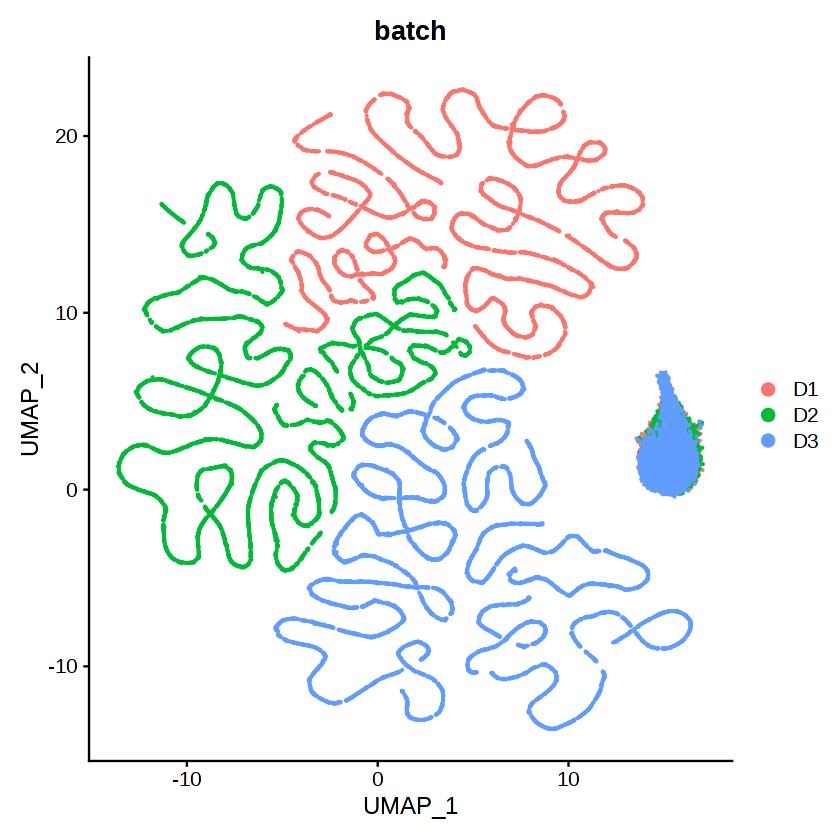

In [49]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

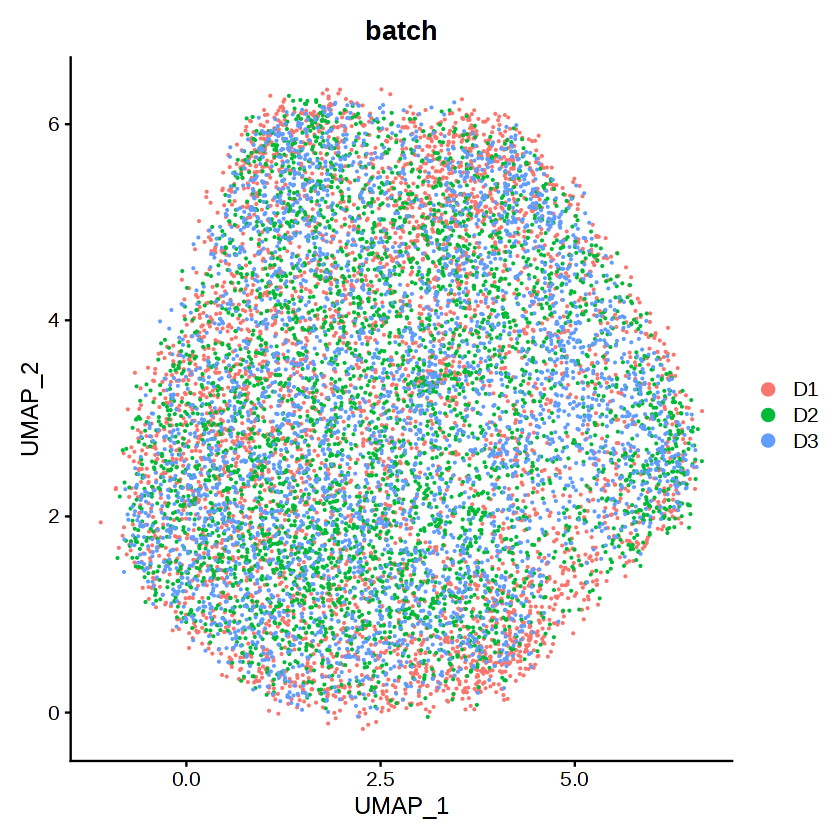

In [ ]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

In [51]:
umap_plot <- DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1) 
ggsave('umap_plot_gg_0607.png',umap_plot)

Saving 6.67 x 6.67 in image


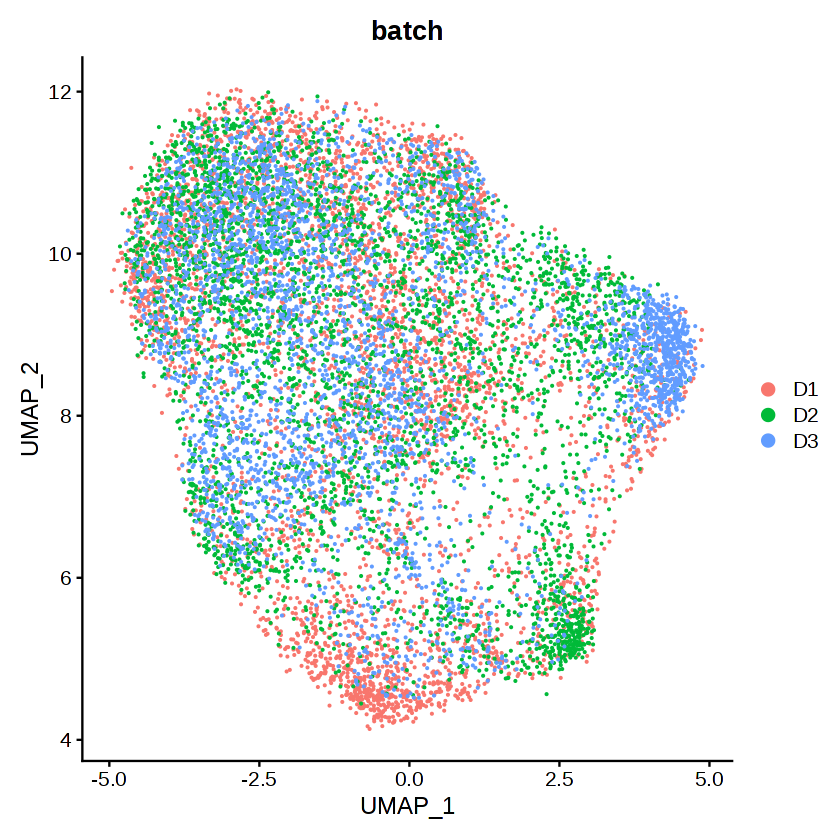

In [20]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

In [24]:
# library(ggplot2)
umap_plot <- DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  
ggsave('umap_plot_gg.png',umap_plot)

ERROR: Error in ggsave("umap_plot_gg.png", umap_plot): could not find function "ggsave"


In [2]:
D1=readRDS('demo_BEER/MGH36.RDS')
D2=readRDS('demo_BEER/MGH53.RDS')
D3=readRDS('demo_BEER/MGH54.RDS')
D4=readRDS('demo_BEER/MGH60.RDS')
D5=readRDS('demo_BEER/MGH93.RDS')
D6=readRDS('demo_BEER/MGH97.RDS')

BATCH=c(rep('D1',ncol(D1)),
        rep('D2',ncol(D2)),
        rep('D3',ncol(D3)),
        rep('D4',ncol(D4)),
        rep('D5',ncol(D5)),
        rep('D6',ncol(D6)) )
        
D12=.simple_combine(D1,D2)$combine
D34=.simple_combine(D3,D4)$combine
D56=.simple_combine(D5,D6)$combine
D1234=.simple_combine(D12,D34)$combine
D123456=.simple_combine(D1234,D56)$combine

DATA=D123456   

# rm(D1);rm(D2);rm(D3);rm(D4);rm(D5);rm(D6)
# rm(D12);rm(D34);rm(D56);rm(D1234);rm(D123456)

[1] "BEER start!"
[1] "2023-03-09 15:55:44 KST"


Loading required package: stringi



[1] "Group number (GNUM) is:"
[1] 30
[1] "Varible gene number (GN) of each batch is:"
[1] 2000
[1] "ROUND is:"
[1] 1
[1] 1
[1] "D1"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 2
[1] "D2"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 3
[1] "D3"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 4
[1] "D4"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 5
[1] "D5"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 6
[1] "D6"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "Total varible gene number (GN) is:"
[1] 4554


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Found 991 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found6batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  BCAN 
Negative:  C1QC 



[1] "Get group for:"
[1] "D1"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D2"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D3"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D4"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D5"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D6"
[1] "Group Number:"
[1] 30
[1] "Finding MN pairs..."
[1] "1 / 180"
[1] "101 / 180"
[1] "ROUND:"
[1] 1
[1] "Number of MN pairs:"
[1] 34
[1] "Evaluating PCs ..."
[1] "Start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] "Finished!!!"
[1] "############################################################################"
[1] "BEER cheers !!! All main steps finished."
[1] "###################

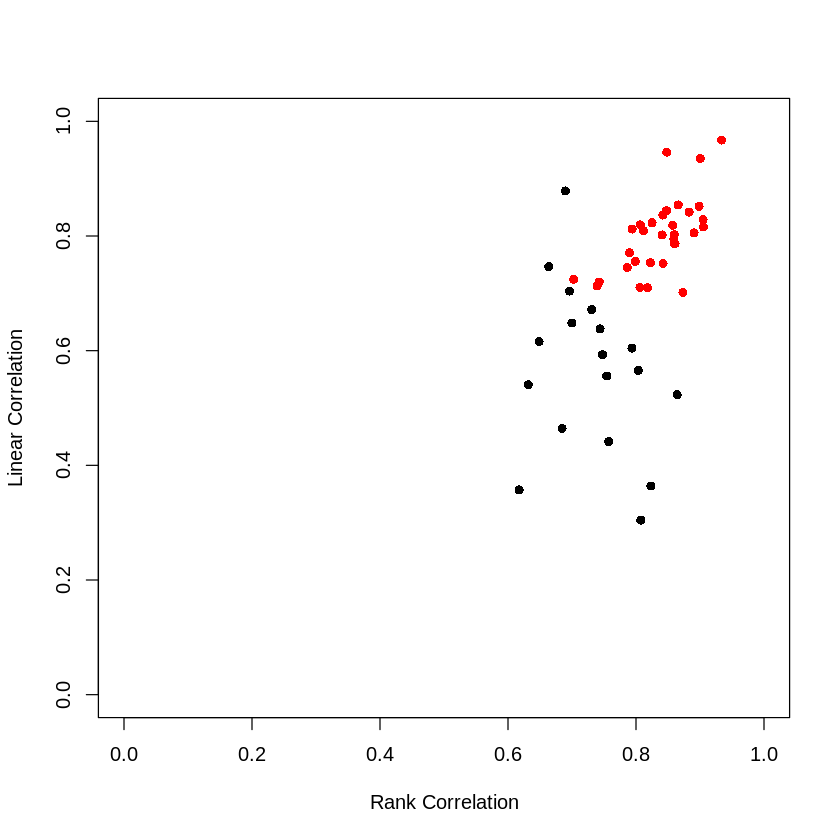

In [3]:
mybeer=BEER(DATA, BATCH, GNUM=30, PCNUM=50, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE )

# Check selected PCs
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix

PC_ 1 
Positive:  LAPTM5 
Negative:  BCAN 



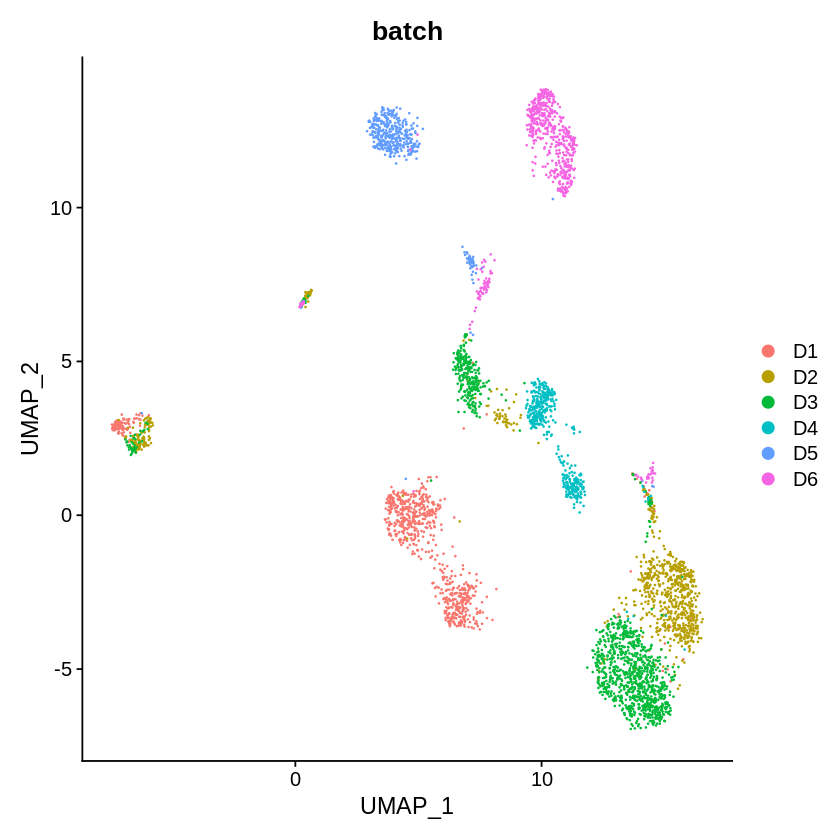

In [4]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

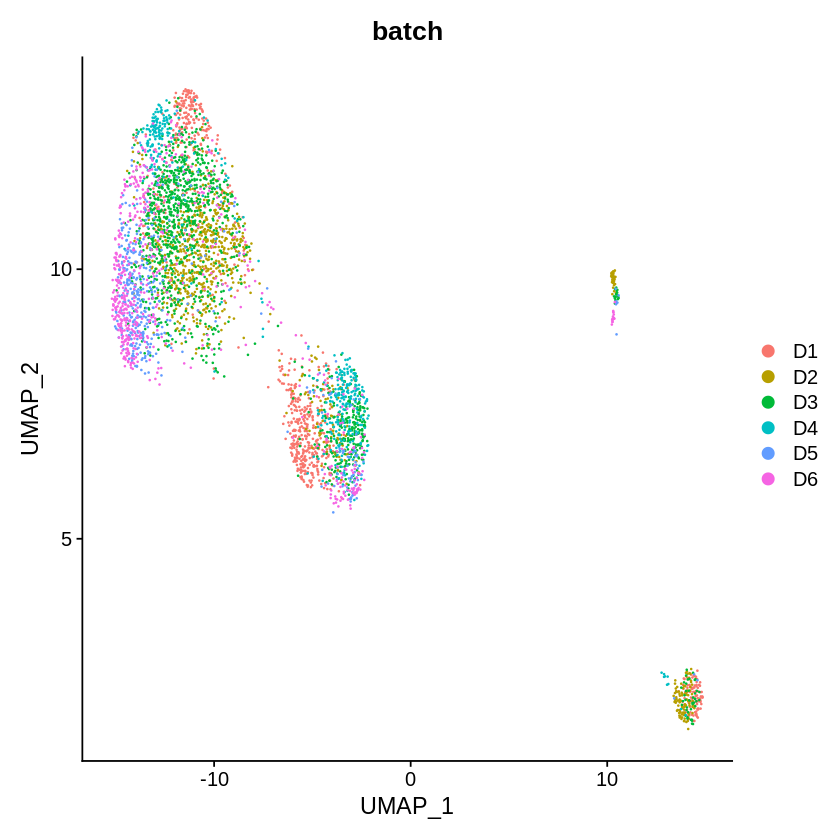

In [5]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

Warning message:
“The following arguments are not used: check_duplicates”


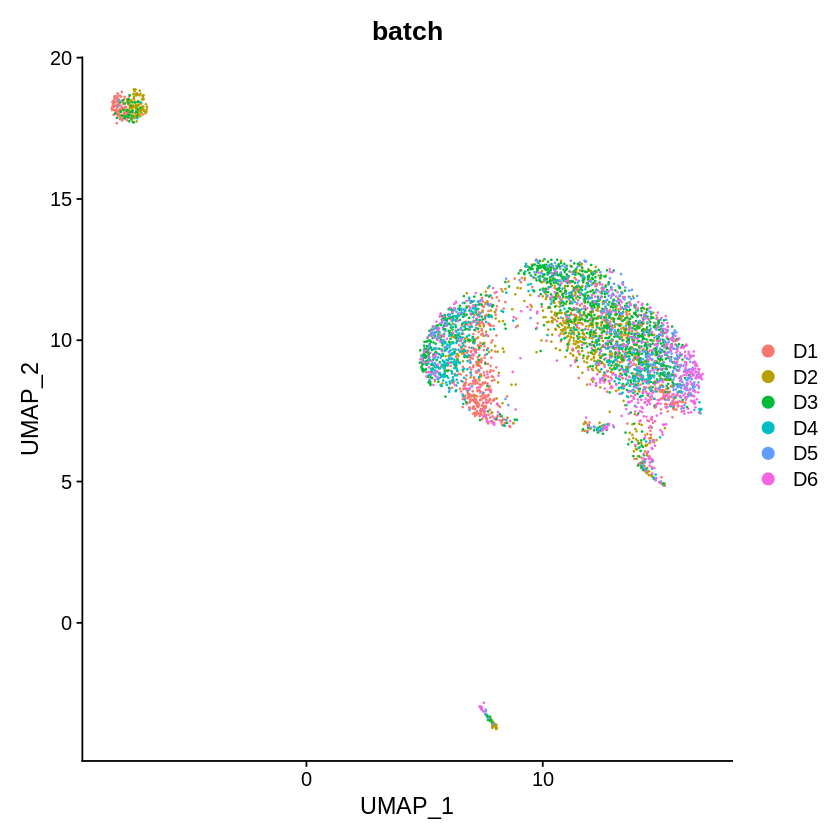

In [6]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, check_duplicates=FALSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

In [ ]:
D1 <- read.table("demo_BEER/DATA1_MAT.txt", sep='\t', row.names=1, header=T)
D2 <- read.table("demo_BEER/DATA2_MAT.txt", sep='\t', row.names=1, header=T)

In [ ]:
colnames(D1)=paste0('D1_', colnames(D1))
colnames(D2)=paste0('D2_', colnames(D2))

DATA=.simple_combine(D1,D2)$combine

BATCH=rep('D2',ncol(DATA))
BATCH[c(1:ncol(D1))]='D1'

In [ ]:
mybeer=BEER(DATA, BATCH, GNUM=30, PCNUM=50, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE, RMG=NULL) 

In [ ]:
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

In [ ]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2)
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

In [ ]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, check_duplicates=FALSE)

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1) 